## Скачеваем библиотеки

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Загружаем данные

In [228]:
df_tast = pd.read_csv('test.csv')
df_tast.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [141]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Анализируем входные данные

In [89]:
len(df)

8693

In [142]:
columns_list = ['PassengerId','HomePlanet','CryoSleep','Cabin','Destination',
                'Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa',
                'VRDeck','Name','Transported']
for i in columns_list:
    print(i, len(df[i].value_counts()))

PassengerId 8693
HomePlanet 3
CryoSleep 2
Cabin 6560
Destination 3
Age 80
VIP 2
RoomService 1273
FoodCourt 1507
ShoppingMall 1115
Spa 1327
VRDeck 1306
Name 8473
Transported 2


In [229]:
df_tast[['Cabin','Cabin_1','Cabin_2']]=df_tast.Cabin.str.split("/",expand=True)

In [144]:
df[['Cabin','Cabin_1','Cabin_2']]=df.Cabin.str.split("/",expand=True)

In [145]:
columns_list = ['PassengerId','HomePlanet','CryoSleep','Cabin','Cabin_1','Cabin_2','Destination',
                'Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa',
                'VRDeck','Name','Transported']
for i in columns_list:
    print(i, len(df[i].value_counts()))

PassengerId 8693
HomePlanet 3
CryoSleep 2
Cabin 8
Cabin_1 1817
Cabin_2 2
Destination 3
Age 80
VIP 2
RoomService 1273
FoodCourt 1507
ShoppingMall 1115
Spa 1327
VRDeck 1306
Name 8473
Transported 2


In [93]:
len(df.Name.str.split(" ",expand=True)[0].value_counts())

2706

In [146]:
columns_list = ['HomePlanet','CryoSleep','Cabin','Cabin_1','Cabin_2','Destination',
                'Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa',
                'VRDeck','Transported']
col_i = 'ghf'
u = 0
for i in columns_list:
    if df[i].value_counts().describe().max()/len(df) > u:
        col_i = i
        u = df[i].value_counts().describe().max()/len(df)
print('Самый сильный дизбаланс в классе: \n', col_i, '%.2f'%u)

Самый сильный дизбаланс в классе: 
 VIP 0.95


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Cabin_1       8494 non-null   object 
 15  Cabin_2       8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [148]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Cabin_1         199
Cabin_2         199
dtype: int64

In [149]:
len(df[(df['HomePlanet'].isnull())|(df['CryoSleep'].isnull())|
   (df['Cabin'].isnull())|(df['Destination'].isnull())|
   (df['Age'].isnull())|(df['VIP'].isnull())|(df['RoomService'].isnull())|
   (df['FoodCourt'].isnull())|(df['ShoppingMall'].isnull())|
   (df['Spa'].isnull())|(df['VRDeck'].isnull())|
   (df['Name'].isnull())])/len(df)

0.24007822385827676

In [150]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Cabin_1          object
Cabin_2          object
dtype: object

In [230]:
df_tast['Cabin_1'] = pd.to_numeric(df_tast['Cabin_1'], errors='coerce')
df_tast.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_1,Cabin_2
0,0013_01,Earth,True,G,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,3.0,S
1,0018_01,Earth,False,F,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,4.0,S
2,0019_01,Europa,True,C,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,S
3,0021_01,Europa,False,C,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1.0,S
4,0023_01,Earth,False,F,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5.0,S


In [152]:
df['Cabin_1'] = pd.to_numeric(df['Cabin_1'], errors='coerce')

In [231]:
df_tast_o=df_tast[['CryoSleep','Cabin','Cabin_2','Destination','VIP',]]
df_tast_f=df_tast[['Cabin_1','Age','RoomService','ShoppingMall','Spa','VRDeck']]

In [154]:
df_o=df[['CryoSleep','Cabin','Cabin_2','Destination','VIP',]]
df_f=df[['Cabin_1','Age','RoomService','ShoppingMall','Spa','VRDeck','Transported']]

In [232]:
df_tast_o=pd.get_dummies(df_tast_o)

In [155]:
df_o=pd.get_dummies(df_o)

In [233]:
df_tast = pd.concat([df_tast_o,df_tast_f],axis=1)

In [156]:
df = pd.concat([df_o,df_f],axis=1)

In [157]:
col_d = df.columns

In [234]:
col_tast_d = df_tast.columns

In [161]:
col_d

Index(['CryoSleep_False', 'CryoSleep_True', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_2_P',
       'Cabin_2_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'Cabin_1', 'Age',
       'RoomService', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

## Заполнение нулей KNNImputer

In [162]:
imputer = KNNImputer(n_neighbors=34, weights='distance')#
df_knn = imputer.fit_transform(df.drop('Transported', axis=1))
df_ = pd.DataFrame(df_knn)
df_.columns = col_d[:23]

In [235]:
df_tast_knn = imputer.transform(df_tast)
df_tast = pd.DataFrame(df_tast_knn)
df_tast.columns = col_tast_d

In [165]:
df_tast.isnull().sum()

CryoSleep_False              0
CryoSleep_True               0
Cabin_A                      0
Cabin_B                      0
Cabin_C                      0
Cabin_D                      0
Cabin_E                      0
Cabin_F                      0
Cabin_G                      0
Cabin_T                      0
Cabin_2_P                    0
Cabin_2_S                    0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Cabin_1                      0
Age                          0
RoomService                  0
ShoppingMall                 0
Spa                          0
VRDeck                       0
dtype: int64

In [236]:
df_tast = df_tast.drop(['Cabin_T','CryoSleep_False','Cabin_2_S','Destination_PSO J318.5-22','VIP_False'],axis=1)

In [105]:
df = df.drop(['Cabin_T','CryoSleep_False','Cabin_2_S','Destination_PSO J318.5-22','VIP_False'],axis=1)

<AxesSubplot:>

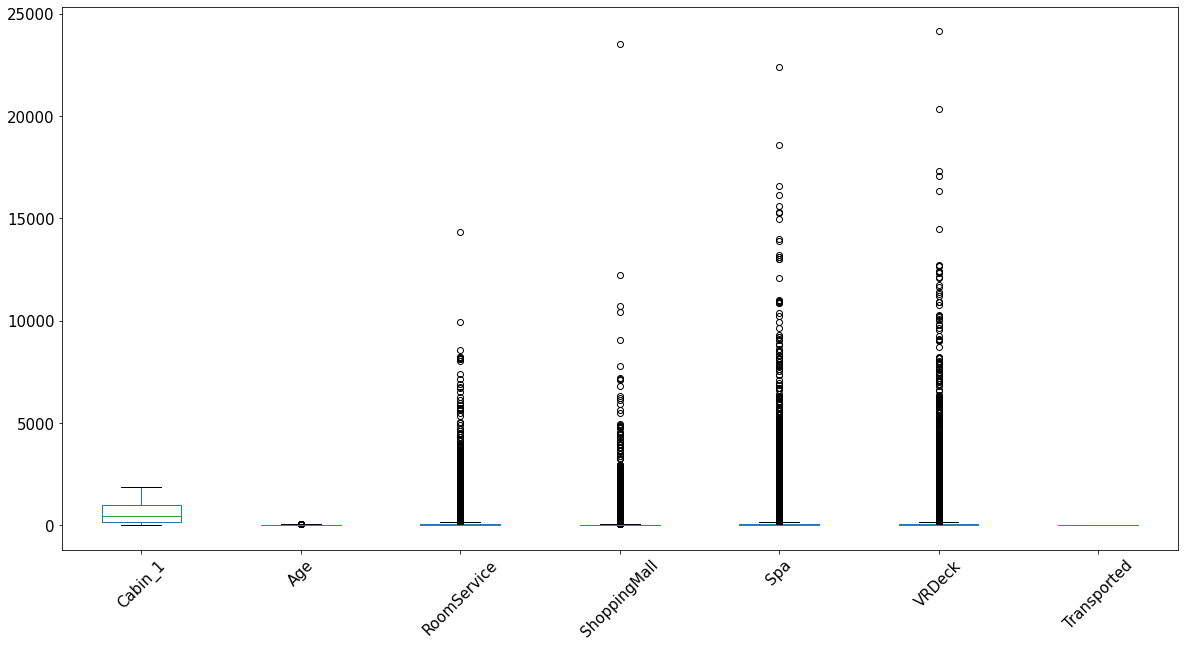

In [106]:
df[['Cabin_1','Age','RoomService','ShoppingMall',
    'Spa','VRDeck','Transported']].boxplot(grid=False,
                                           figsize=(20,10),
                                           rot=45,fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShoppingMall'>

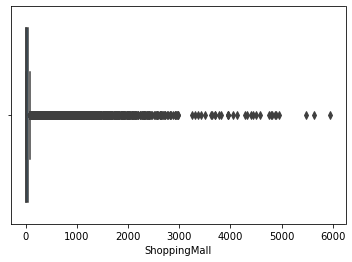

In [107]:
sns.boxplot(df['ShoppingMall'][df['ShoppingMall']<6000])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VRDeck'>

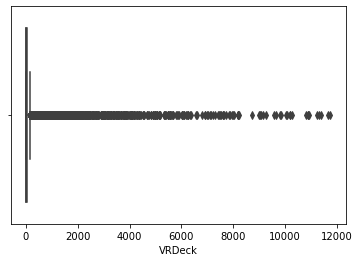

In [108]:
sns.boxplot(df['VRDeck'][df['VRDeck']<12000])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spa'>

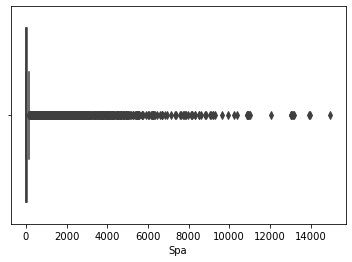

In [109]:
sns.boxplot(df['Spa'][df['Spa']<15000])

In [110]:
len(df[~((df['ShoppingMall']<5000)&
       (df['VRDeck']<8000)&
       (df['RoomService']<6000)&
       (df['Spa']<7000))])/len(df)

0.014149315541240078

In [111]:
len(df[~((df['ShoppingMall']<6000)&
       (df['VRDeck']<12000)&
       (df['RoomService']<9000)&
       (df['Spa']<12000))])

45

<AxesSubplot:>

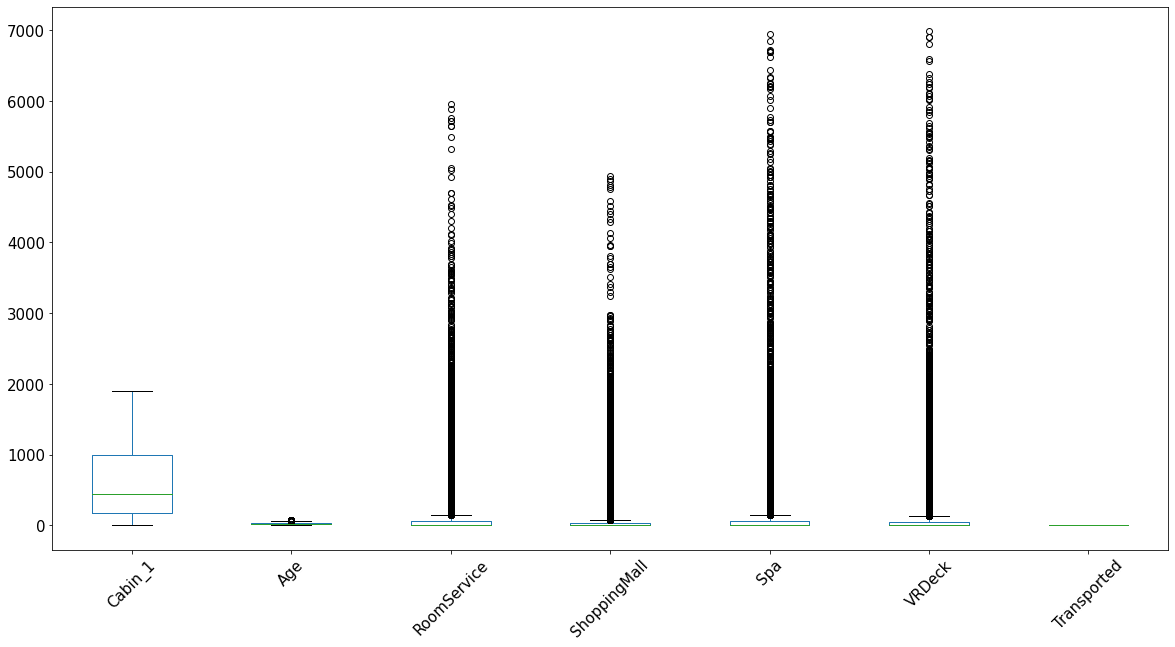

In [112]:
df[['Cabin_1','Age','RoomService','ShoppingMall',
    'Spa','VRDeck','Transported']
  ][(df['ShoppingMall']<5000)&
    (df['RoomService']<6000)&
    (df['VRDeck']<7000)&
    (df['Spa']<7000)].boxplot(grid=False,figsize=(20,10),
                              rot=45,fontsize=15)

In [113]:
df = df[(df['ShoppingMall']<5000)&(df['RoomService']<6000)&
        (df['VRDeck']<7000)&(df['Spa']<7000)]

In [114]:
df_f = df_f[(df_f['ShoppingMall']<5000)&(df_f['RoomService']<6000)&
        (df_f['VRDeck']<7000)&(df_f['Spa']<7000)]

<Figure size 1080x1080 with 0 Axes>

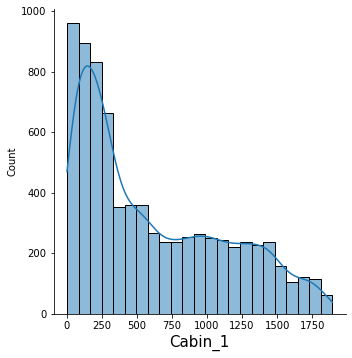

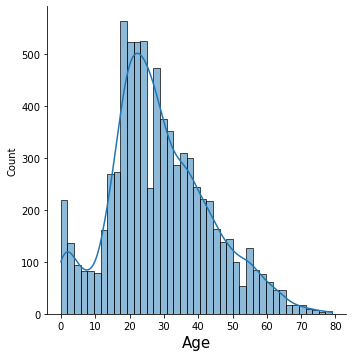

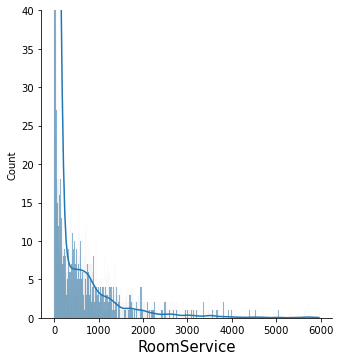

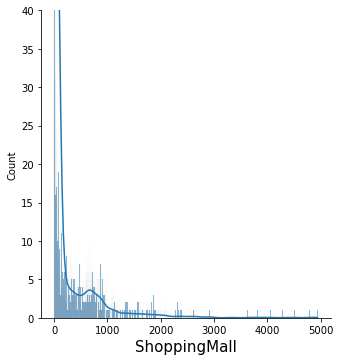

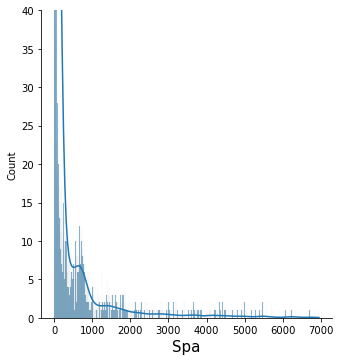

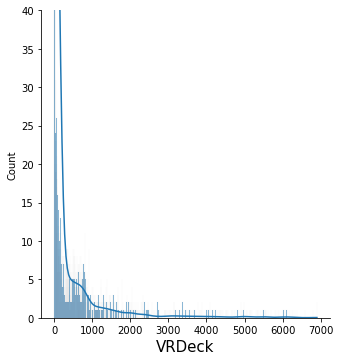

In [115]:
plt.figure(figsize=(15,15))
plot_ = 1
for column in df_f.columns:
    if plot_ <= 6:
        #ax = plt.subplot(3,3, plot_)
        sns.displot(df_f[column], kde=True)
        plt.xlabel(column, fontsize=15)
        if plot_> 2:
            plt.ylim(0, 40)
    plot_+=1
plt.show()

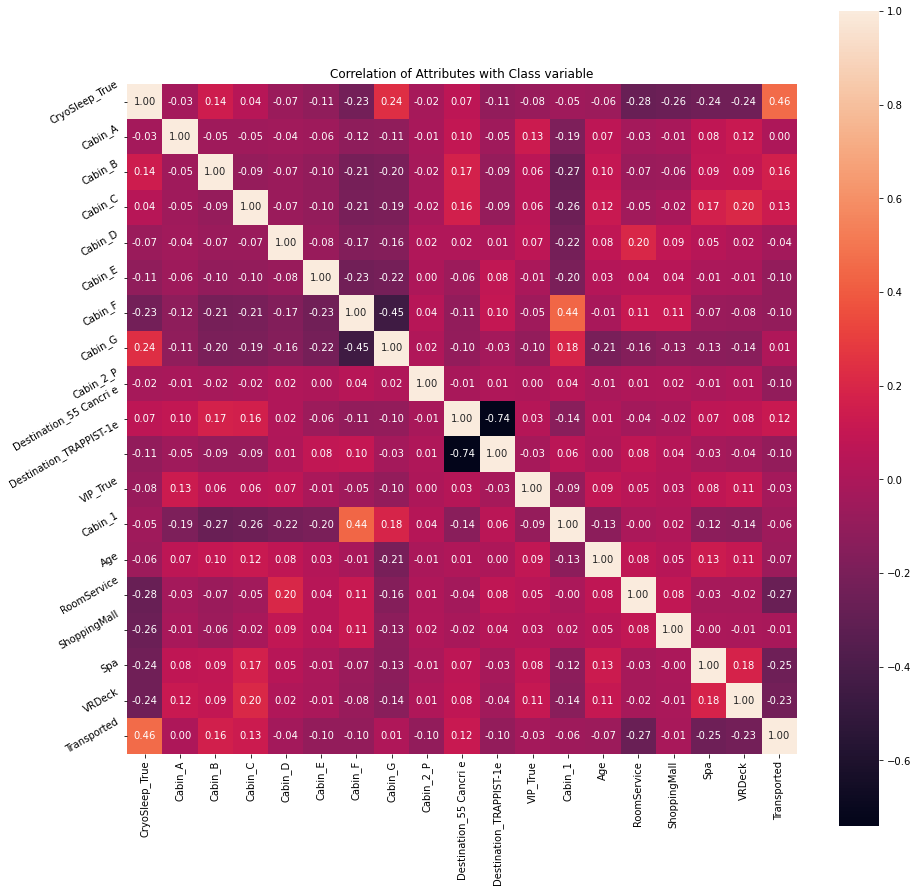

In [116]:
plt.figure(figsize=(15,15))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

## Разделение данных 

In [117]:
X = df.drop('Transported', axis=1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## StandardScaler

In [118]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)

X_test_s = scaler.transform(X_test)

In [237]:
df_tast_s = scaler.transform(df_tast)

## RandomForestClassifier

In [247]:
clf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[64,100,128,200],
              'max_features':[2,3,4],
              'max_depth':[2,3,4,5,10,15],
              'min_samples_leaf':[1,2,3,4],
              'max_features':['sqrt','log2',int],#,int
              'bootstrap':[True, False],
              'oob_score':[True, False]}
grid = GridSearchCV(clf,param_grid)

%time grid.fit(X_train_s, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2880 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\jo

CPU times: total: 25min 33s
Wall time: 25min 38s


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', <class 'int'>],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [248]:
print(grid.best_params_)

{'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100, 'oob_score': False}


In [249]:
model = grid.best_estimator_
y_fit = model.predict(X_test_s)

              precision    recall  f1-score   support

     class 0       0.78      0.82      0.80       811
     class 1       0.83      0.79      0.81       900

    accuracy                           0.80      1711
   macro avg       0.80      0.81      0.80      1711
weighted avg       0.81      0.80      0.80      1711



<AxesSubplot:>

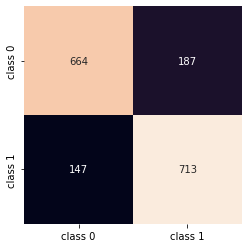

In [250]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_fit,
                            target_names=target_names))
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

### Выгрузка результатов

In [251]:
df_tast_ = pd.DataFrame(model.predict(df_tast_s))

In [252]:
ss = pd.read_csv('sample_submission.csv')
ss.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [253]:
ss['Transported'] = df_tast_
ss.head()

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,1.0


In [254]:
ss['Transported'][ss['Transported']==0] = False
ss['Transported'][ss['Transported']==1] = True
ss.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2548\3221636319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['Transported'][ss['Transported']==0] = False


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [255]:
ss.to_csv('sample_submission_.csv',index=False)

## AdaBoostClassifier

In [206]:
param_grid = {'n_estimators':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,65,100,150,200]}
ab_model = AdaBoostClassifier(random_state=42)
grid = GridSearchCV(ab_model, param_grid)
%time grid.fit(X_train_s, y_train)
model = AdaBoostClassifier(n_estimators=1)

CPU times: total: 18 s
Wall time: 18.1 s


In [207]:
print(grid.best_params_)
model = grid.best_estimator_
y_fit = model.predict(X_test_s)

{'n_estimators': 50}


              precision    recall  f1-score   support

     class 0       0.79      0.77      0.78       811
     class 1       0.80      0.81      0.80       900

    accuracy                           0.79      1711
   macro avg       0.79      0.79      0.79      1711
weighted avg       0.79      0.79      0.79      1711



<AxesSubplot:>

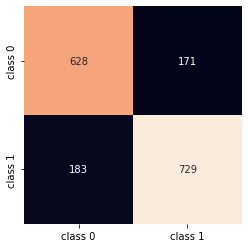

In [208]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_fit,
                            target_names=target_names))
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

## GradientBoostingClassifier

In [225]:
param_grid = {'n_estimators':[40,50,65,110,115,120,125,130],#,200
              'learning_rate':[0.01,0.05,0.1,0.2,0.3], #,0.4,0.5,0.6 
              'max_depth':[3,4,5,6,7]} #,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model, param_grid)
%time grid.fit(X_train_s, y_train)

CPU times: total: 19min 33s
Wall time: 19min 38s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [40, 50, 65, 110, 115, 120, 125, 130]})

In [226]:
print(grid.best_params_)
model = grid.best_estimator_
y_fit = model.predict(X_test_s)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120}


              precision    recall  f1-score   support

     class 0       0.79      0.80      0.80       811
     class 1       0.82      0.81      0.81       900

    accuracy                           0.81      1711
   macro avg       0.80      0.81      0.81      1711
weighted avg       0.81      0.81      0.81      1711



<AxesSubplot:>

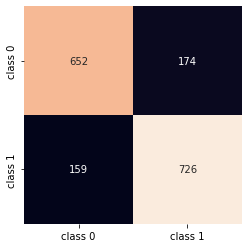

In [227]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_fit,
                            target_names=target_names))
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

### Выгрузка результатов

In [243]:
df_tast_ = pd.DataFrame(model.predict(df_tast_s))

In [244]:
ss = pd.read_csv('sample_submission.csv')
ss.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [245]:
ss['Transported'] = df_tast_
ss['Transported'][ss['Transported']==0] = False
ss['Transported'][ss['Transported']==1] = True
ss.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2548\900063205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['Transported'][ss['Transported']==0] = False


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [246]:
ss.to_csv('GradientBoostingClassifier.csv',index=False)

## KNeighborsClassifier

In [85]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],
              'weights':['uniform', 'distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute']}
grid = GridSearchCV(knn_model,param_grid)

%time grid.fit(X_train_s, y_train)

CPU times: total: 8min 25s
Wall time: 3min 39s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                                         36, 37, 38, 39, 40],
                         'weights': ['uniform', 'distance']})

In [86]:
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'distance'}


In [41]:
model = grid.best_estimator_
y_fit = model.predict(X_test_s)

              precision    recall  f1-score   support

     class 0       0.74      0.79      0.77       811
     class 1       0.80      0.75      0.78       900

    accuracy                           0.77      1711
   macro avg       0.77      0.77      0.77      1711
weighted avg       0.77      0.77      0.77      1711



<AxesSubplot:>

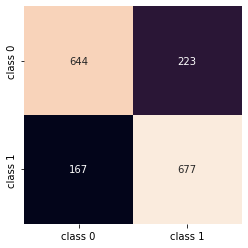

In [42]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_fit,
                            target_names=target_names))
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

## SVC

In [44]:
svc_model = SVC()
param_grid = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,2,5,10,25,50],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':['scale','auto']}#  ,'precomputed'
grid = GridSearchCV(svc_model,param_grid)

%time grid.fit(X_train_s, y_train)

CPU times: total: 15min 27s
Wall time: 15min 28s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 25,
                               50],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [45]:
print(grid.best_params_)
model = grid.best_estimator_
y_fit = model.predict(X_test_s)

{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}


              precision    recall  f1-score   support

     class 0       0.78      0.78      0.78       811
     class 1       0.80      0.80      0.80       900

    accuracy                           0.79      1711
   macro avg       0.79      0.79      0.79      1711
weighted avg       0.79      0.79      0.79      1711



<AxesSubplot:>

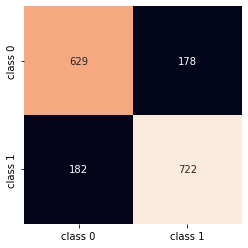

In [46]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_fit,
                            target_names=target_names))
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

## DecisionTreeClassifier

CPU times: total: 1.31 s
Wall time: 1.32 s
{'criterion': 'gini', 'max_depth': 6}
              precision    recall  f1-score   support

     class 0       0.79      0.69      0.74       811
     class 1       0.75      0.84      0.79       900

    accuracy                           0.77      1711
   macro avg       0.77      0.76      0.76      1711
weighted avg       0.77      0.77      0.76      1711



C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messa

<AxesSubplot:>

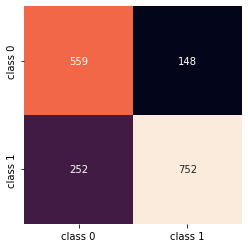

In [48]:
dtc = DecisionTreeClassifier(random_state=0)

param_grid = {'max_depth':[2,3,4,5,6,10,15],
              'criterion':['gini', 'entropy', 'log_loss']}
grid = GridSearchCV(dtc,param_grid)

%time grid.fit(X_train_s, y_train)

print(grid.best_params_)
model = grid.best_estimator_
y_fit = model.predict(X_test_s)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_fit,
                            target_names=target_names))

mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)